In [1]:
import pandas as pd
import numpy as np

In [2]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: Data/scrape.csv         
  inflating: Data/scrapper.py        


In [3]:
data=pd.read_csv('Data/scrape.csv',index_col='date',parse_dates=True)
data.head()

,rupee
date,
2016-01-04,66.5277
2016-01-05,66.5471
2016-01-06,66.7124
2016-01-07,66.7392
2016-01-08,66.8250


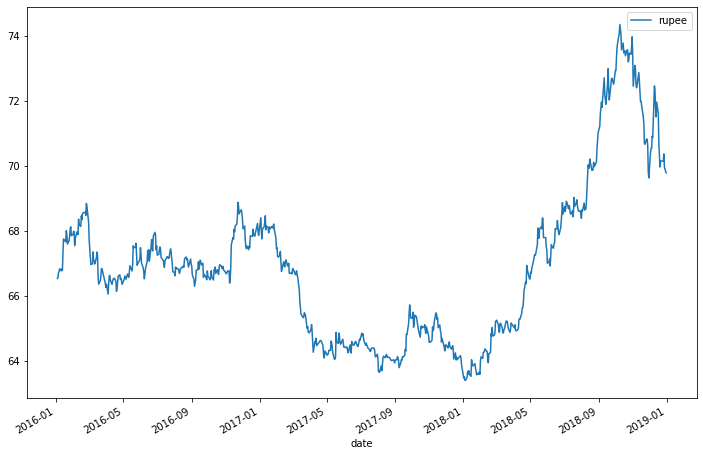

In [4]:
data.plot(figsize=(12,8))

In [5]:
test_size=30
train_index=len(data)-test_size
train=data.iloc[:train_index]
test=data.iloc[train_index:]

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range = (0,1))
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [7]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 15
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,GRU
from tensorflow.keras.optimizers import Adam

### LSTM ###

model_lstm = Sequential()

model_lstm.add(LSTM(100,activation='relu',input_shape=(length, n_features)))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(1))

opt=Adam(lr=0.0001)
model_lstm.compile(optimizer=opt, loss='mse')

### GRU ###

model_gru = Sequential()

model_gru.add(GRU(100,activation='relu',input_shape=(length, n_features)))
model_gru.add(Dropout(0.2))

model_gru.add(Dense(1))

opt=Adam(lr=0.0001)
model_gru.compile(optimizer=opt, loss='mse')

In [9]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [11]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

x,y=validation_generator[0]
print(x,y)

[[[0.75068493]
  [0.74063927]
  [0.72283105]
  [0.66666667]
  [0.66347032]
  [0.67853881]
  [0.67762557]
  [0.66027397]
  [0.58630137]
  [0.56894977]
  [0.64018265]
  [0.65205479]
  [0.65205479]
  [0.68630137]
  [0.68219178]]] [[0.82744292]]


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [13]:
model_lstm.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
714/714 [==============================] - 6s 7ms/step - loss: 0.0524 - val_loss: 0.0083
Epoch 2/20
714/714 [==============================] - 5s 6ms/step - loss: 0.0040 - val_loss: 0.0087
Epoch 3/20
714/714 [==============================] - 5s 6ms/step - loss: 0.0036 - val_loss: 0.0080
Epoch 4/20
714/714 [==============================] - 5s 6ms/step - loss: 0.0033 - val_loss: 0.0074
Epoch 5/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 6/20
714/714 [==============================] - 5s 6ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 7/20
714/714 [==============================] - 4s 6ms/step - loss: 0.0027 - val_loss: 0.0079
Epoch 8/20
714/714 [==============================] - 4s 6ms/step - loss: 0.0027 - val_loss: 0.0071
Epoch 9/20
714/714 [==============================] - 4s 6ms/step - loss: 0.0029 - val_loss: 0.0068
Epoch 10/20
714/714 [==============================] - 4s 6ms/step - loss: 0.0024 - val_loss: 0.0066

In [14]:
model_gru.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
714/714 [==============================] - 6s 7ms/step - loss: 0.0551 - val_loss: 0.0053
Epoch 2/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 3/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 4/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 5/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0021 - val_loss: 0.0047
Epoch 6/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0021 - val_loss: 0.0048
Epoch 7/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 8/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 9/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 10/20
714/714 [==============================] - 5s 7ms/step - loss: 0.0020 - val_loss: 0.0040

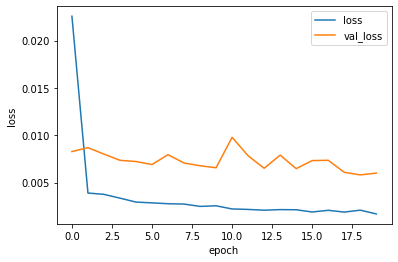

In [15]:
loss = pd.DataFrame(model_lstm.history.history)
loss.plot(xlabel='epoch',ylabel='loss')

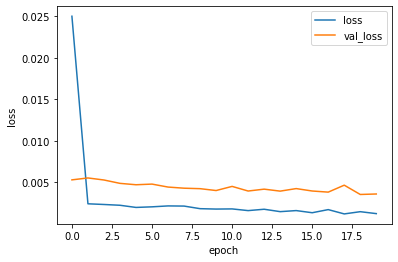

In [16]:
loss = pd.DataFrame(model_gru.history.history)
loss.plot(xlabel='epoch',ylabel='loss')

In [17]:
train_predictions_lstm=[]
train_predictions_gru=[]

first_eval_batch = scaled_train[:length]
train_predictions_lstm=list(first_eval_batch)
train_predictions_gru=list(first_eval_batch)
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(train)-length):
    current_pred1 = model_lstm.predict(current_batch)[0]
    current_pred2 = model_gru.predict(current_batch)[0]
    train_predictions_lstm.append(current_pred1)
    train_predictions_gru.append(current_pred2) 
    print(current_pred1,current_pred2,scaled_train[i])
    current_batch = np.append(current_batch[:,1:,:],[[scaled_train[i+length]]],axis=1)    

[0.39417076] [0.40133998] [0.28654795]
[0.39719868] [0.39773974] [0.28831963]
[0.39993316] [0.4011537] [0.30341553]
[0.4052658] [0.4129387] [0.30586301]
[0.41150284] [0.42347556] [0.31369863]
[0.4138329] [0.41900146] [0.308]
[0.41484034] [0.41576293] [0.31385388]
[0.41614616] [0.41740185] [0.30882192]
[0.4168523] [0.41864386] [0.36037443]
[0.41060376] [0.40107882] [0.39771689]
[0.4062401] [0.39816573] [0.39184475]
[0.4055308] [0.4059083] [0.38945205]
[0.4055326] [0.41086948] [0.42103196]
[0.4060077] [0.41201156] [0.40812785]
[0.41423547] [0.4308686] [0.38322374]
[0.4211427] [0.43692428] [0.39321461]
[0.4269989] [0.43768635] [0.40552511]
[0.43557537] [0.44989216] [0.42611872]
[0.44172198] [0.45325166] [0.43171689]
[0.4487939] [0.46182856] [0.40705936]
[0.45523876] [0.46791336] [0.4096347]
[0.46100408] [0.4718324] [0.41871233]
[0.46512228] [0.47366935] [0.41854795]
[0.46685064] [0.47046173] [0.37899543]
[0.47234976] [0.48257774] [0.39838356]
[0.47701144] [0.4876897] [0.41712329]
[0.47346

In [18]:
test_predictions_lstm=[]
test_predictions_gru=[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

cnt=0
for i in range(len(test)):
    current_pred1 = model_lstm.predict(current_batch)[0]
    current_pred2 = model_gru.predict(current_batch)[0]
    test_predictions_lstm.append(current_pred1) 
    test_predictions_gru.append(current_pred2)
    print(current_pred1,current_pred2,scaled_train[i])
    current_batch = np.append(current_batch[:,1:,:],[[scaled_test[i]]],axis=1)
    

[0.80388856] [0.7871875] [0.28654795]
[0.7828659] [0.7645657] [0.28831963]
[0.7629205] [0.74723345] [0.30341553]
[0.74475414] [0.73030454] [0.30586301]
[0.71902704] [0.69465065] [0.31369863]
[0.69280857] [0.6724288] [0.308]
[0.67461574] [0.6690993] [0.31385388]
[0.6617854] [0.66971064] [0.30882192]
[0.65178543] [0.6638684] [0.36037443]
[0.6343358] [0.6249982] [0.39771689]
[0.6155016] [0.59132797] [0.39184475]
[0.60734594] [0.6054173] [0.38945205]
[0.60446537] [0.62409014] [0.42103196]
[0.60856926] [0.6374354] [0.40812785]
[0.6250724] [0.6589063] [0.38322374]
[0.64547443] [0.67067045] [0.39321461]
[0.68037015] [0.7319689] [0.40552511]
[0.70820326] [0.7632261] [0.42611872]
[0.72458357] [0.76483005] [0.43171689]
[0.7318133] [0.75337464] [0.40705936]
[0.74179083] [0.76296806] [0.4096347]
[0.7445017] [0.75562125] [0.41871233]
[0.7299334] [0.7087907] [0.41854795]
[0.7034773] [0.6619504] [0.37899543]
[0.66894066] [0.6211735] [0.39838356]
[0.6384697] [0.60921335] [0.41712329]
[0.61347026] [0.6

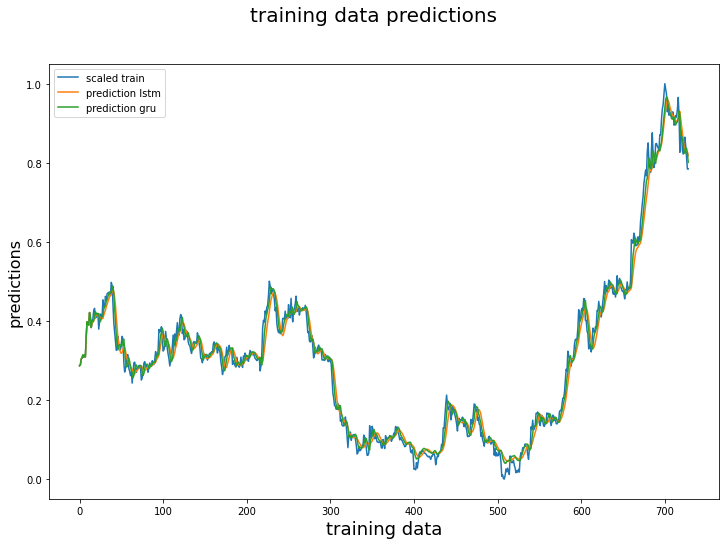

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8))
fig.suptitle('training data predictions', fontsize=20)
plt.xlabel('training data', fontsize=18)
plt.ylabel('predictions', fontsize=16)
plt.plot(scaled_train,label='scaled train')
plt.plot(train_predictions_lstm,label='prediction lstm')
plt.plot(train_predictions_gru,label='prediction gru')
plt.legend()

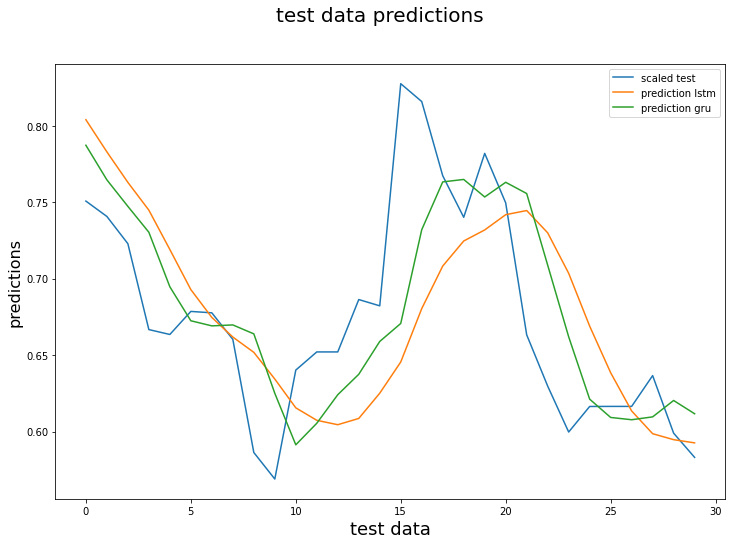

In [20]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8))
fig.suptitle('test data predictions', fontsize=20)
plt.xlabel('test data', fontsize=18)
plt.ylabel('predictions', fontsize=16)
plt.plot(scaled_test,label='scaled test')
plt.plot(test_predictions_lstm,label='prediction lstm')
plt.plot(test_predictions_gru,label='prediction gru')
plt.legend()

In [21]:
test.insert(1,"prediction_lstm",scaler.inverse_transform(test_predictions_lstm).reshape(-1) , True)
test.insert(2,"prediction_gru",scaler.inverse_transform(test_predictions_gru).reshape(-1) , True)
test

,rupee,prediction_lstm,prediction_gru
date,,,
2018-11-19,71.6100,72.192580,72.009703
2018-11-20,71.5000,71.962381,71.761994
2018-11-21,71.3050,71.743979,71.572206
2018-11-22,70.6900,71.545058,71.386835
2018-11-23,70.6550,71.263346,70.996425
2018-11-26,70.8200,70.976254,70.753095
2018-11-27,70.8100,70.777042,70.716637
2018-11-28,70.6200,70.636550,70.723331
2018-11-29,69.8100,70.527050,70.659359


In [22]:
loss1=model_lstm.evaluate(generator)
loss2=model_lstm.evaluate(validation_generator)
print(loss1,loss2)
print()
loss1=model_gru.evaluate(generator)
loss2=model_gru.evaluate(validation_generator)
print(loss1,loss2)

15/15 [==============================] - 0s 2ms/step - loss: 0.0060
0.0009478574502281845 0.005997308995574713

15/15 [==============================] - 0s 2ms/step - loss: 0.0036
0.0005313101573847234 0.003602085867896676
